# 使用模型进行预测
predict

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_iris
import os
import pandas as pd
import numpy as np
import tensorflow.keras as keras
from keras import Model
from tensorflow.keras import Model
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
os.environ['CUDA_VISIBLE_DEVICES'] = '1' # 使用 GPU 1
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0],True)
logical_devices = tf.config.list_logical_devices("GPU")

In [2]:
# 加载数据
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
# 使用class形式进行构建

class MnistModel(Model):
    def __init__(self):
        super(MnistModel, self).__init__()
        self.flatten = keras.layers.Flatten()
        self.d1 = keras.layers.Dense(units=128, activation='relu')
        self.d2 = keras.layers.Dense(units=10, activation='softmax')

    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        y = self.d2(x)
        return y

model = MnistModel()

In [13]:
model.load_weights(filepath='tensorflow_study/chapter4/model_dir/checkpoint')

In [14]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), # 由于是softmax概率和int label的loss 所以使用SparseCategoricalCrossentropy
    metrics=['sparse_categorical_accuracy']
)

In [15]:
model.fit(x_train,y_train,batch_size=64,epochs=1, validation_data=(x_test, y_test), validation_freq=1)

938/938 [==============================] - 4s 3ms/step - loss: 0.0732 - sparse_categorical_accuracy: 0.9857 - val_loss: 0.7687 - val_sparse_categorical_accuracy: 0.9600


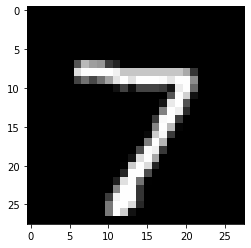

In [18]:
plt.imshow(x_test[0],cmap='gray')
plt.show()

In [24]:
test_one = x_test[0]
print(test_one.shape)
type(test_one)
# 必须要有batch维 所以要将其变成(1, 28, 28)

(28, 28)


numpy.ndarray

In [32]:
# 方法一
test_one_1 = test_one[tf.newaxis, ...]
print(test_one_1.shape)

(1, 28, 28)


In [39]:
# 方法二
test_one_2 = test_one.reshape(1,28,28)
test_one_2.shape

(1, 28, 28)

In [40]:
model.predict(test_one_1)
# 这是一个概率分布 需要用argmax转为预测值

array([[0.0000000e+00, 2.0721208e-38, 1.0709778e-32, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.5887690e-37]], dtype=float32)

In [37]:
res1 = tf.argmax(model.predict(test_one_1), axis=1)
res1
# 需要在axis = 1维度上进行计算

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([7])>

In [38]:
res2 = tf.argmax(model.predict(test_one_2), axis=1)
res2

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([7])>